# Product-Mix Optimization - By Ashish Vaigandla

### MS Business Analytics, UCLA Anderson, Class of 2023

### M.Tech & B.Tech Ocean Engineering with Data Science focus, IIT Madras, Class of 2022


## Problem Statement 

You are producing beverage mugs and are trying to identify the best price-feature-vector. Assume the following attributes and attribute levels:

Price: USD 30 , USD 10, USD 5

Time Insulated: 0.5 hrs, 1 hrs, 3 hrs

Capacity: 12 oz, 20 oz, 32 oz

Cleanability: Difficult (7 min), Fair (5 min), Easy (2 min) 

Containment: Slosh resistant, Spill resistant, Leak resistant 

Brand: A, B, C

Assume the following as the "proposed market scenario", ie the scenario with the current competitors and our proposed candidate.

Incumbents

1: $ 30, 3 hrs, 20 oz, Clean Easy, Leak Resistant, Brand A

2: $ 10, 1 hrs, 20 oz, Clean Fair, Spill Resistant, Brand B 

Our proposed candidate

3: $ 30, 1 hrs, 20 oz, Clean Easy, Leak Resistant, Brand C

Assume the following cost structure:

Time Insulated: 0.5 hrs costs USD 0.5 , 1 hrs costs USD 1, 3 hrs costs USD 3

Capacity: 12 oz costs USD 1.00, 20 oz costs USD 2.6, 32 oz costs USD 2.8

Cleanability: Difficult (7 min) costs USD 1, Fair (5 min) costs USD 2.2, Easy (2 min) costs USD 3.0 

Containment: Slosh resistant costs USD 0.5, Spill resistant costs USD 0.8, Leak resistant costs USD 1

You are given data on the preference parameters of 311 consumers in the "mugs- preference-parameters-full.xlsx" file.

## Loading Data

In [1]:
import pandas as pd
import numpy as np
import itertools

In [2]:
# Loading the dataframe and dropping the Cust column
df = pd.read_excel('mugs-preference-parameters-full.xlsx')
df = df.drop(['Cust'], axis = 1)

# Concepts 


## Evaluate potential market offerings by setting the pricing/monetization scheme

The algorithmic-analytical view of value creation:

Construct all feasible candidate products made up of all combinations of the attributes (Price, Time Insulated,

Capacity, Cleanability, Containment, Brand) and attribute levels (3 levels for each attribute). 

For each candidate product P :

1. Compute predicted expected market share s(P ) against the incumbent set:

(a) For each consumer, based on his/her preference parameters, determine the probability or likelihood of the consumer buying P , using a compensatory model, i.e., by estimating utilities.

(b) Aggregate across all consumers.

2. Compute predicted cost(P) and margin(P) using cost data from production team

3. Compute predicted expected profit(P) for P as follows:

profit(P) = sales volume(P) × profit margin(P)

## Starting Point: The incumbent set, the candidate product, the preference parameters

Price: USD 30 , USD 10, USD 5

Time Insulated: 0.5 hrs, 1 hrs, 3 hrs

Capacity: 12 oz, 20 oz, 32 oz

Cleanability: Difficult (7 min), Fair (5 min), Easy (2 min)

Containment: Slosh resistant, Spill resistant, Leak resistant 

Brand: A, B, C

The market scenario:

Incumbents

1: $ 30, 3 hrs, 20 oz, Clean Easy, Leak Resistant, Brand A

2: $ 10, 1 hrs, 20 oz, Clean Fair, Spill Resistant, Brand B 

Our proposed candidate

3: $ 30, 1 hrs, 20 oz, Clean Easy, Leak Resistant, Brand C



## Step -1: Expected market share s(P) against the incumbent set


### Calculating Utilities

For each customer, based on his/her preference parameters, determine the likelihood of the consumer buying P , using a compensatory model”

Compensatory model:

• Compute the utility of each product P as: 

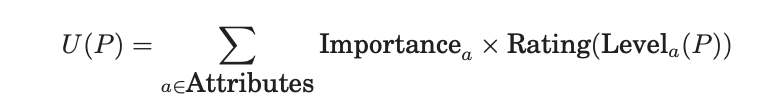

• The likelihood of the consumer buying P increases with U(P)

### The Logit Formula  for estimating the likelihood of the consumer buying P and market share s(P)

### (also adjusts uncertainty in Utilities)

The logit formula for the probability that a certain customer will buy the product, given utilities for your candidate product P (u_p) and competitor incumbents I1, I2, I3, and an uncertainty measure c (**c= 0.0139** as a standard value), can be expressed as:













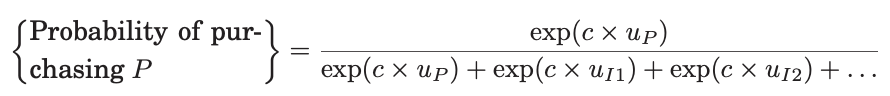

For instance, let's consider the following example for a customer with utilities for Products 1, 2, and 3:

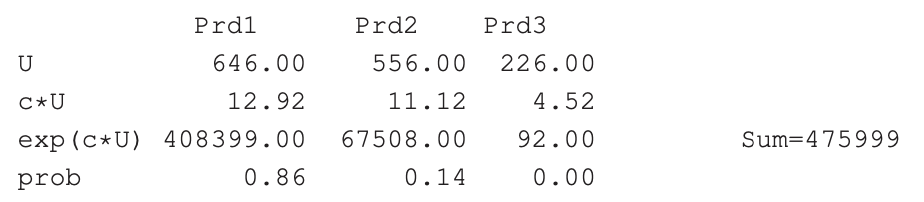

### Averaging the above probability over all customers gives the predicted market share s(P) for product P.

## Step 2: Compute predicted cost(P) and margin(P) using cost data from production team

**cost(P)**:

We can estimate the **cost(P)** from the given data based on Insulation time (0.5 hrs, 1 hrs, 3 hrs), Capacity (12 oz, 20 oz, 32 oz), Cleanability level (Difficult (7 min), Fair (5 min), Easy (2 min)), Containment type (Slosh resistant, Spill resistant, Leak resistant).

**Margin: margin(P) = Price(P) - cost(P)**



## Step 3: Compute predicted expected profit(P) per person for P as follows:

profit(P) = sales volume(P) × profit margin(P) = {# of persons in the future market} × s(P) × {Price(P ) − cost(P)}
          
**eppp: expected profit(P) per person  = (profit(P)/# of persons in the future market) = s(P) × {Price(P ) − cost(P)}**

# Code:

### Let's define the required variables, costs and incumbents as follows:

In [3]:
# Defining the required variables 

c = 0.0139
n_levels = 3
n_attributes = 6
n_customers = 311
n_products = n_levels**(n_attributes-1) # excluding the brand attribute as we need only brand C
n_products_focus = 3


# Defining cost calculations for 6 attributes as follows - to identify the best price-feature-vector
# Price: $30, $10, $5 - defining as 0's in the array - [0, 0, 0] 
# Time Insulated: 0.5 hrs costs $0.5, 1 hrs costs $1, 3 hrs costs $3 - [0.5, 1.0, 3.0]
# Capacity: 12 oz costs $1.00, 20 oz costs $2.6, 32 oz costs $2.8 - [1.0, 2.6, 2.8]
# Cleanability: Difficult (7 min) costs $1, Fair (5 min) costs $2.2, Easy (2 min) costs $3.0 - [1.0, 2.2, 3.0]
# Containment: Slosh resistant costs $0.5, Spill resistant costs $0.8, Leak resistant costs $1 - [0.5, 0.8, 1.0]
# Brand: A, B, C - defining as 0's in the array -[0.0, 0.0, 0.0]

costs = np.array([[0.0, 0.0, 0.0], [0.5, 1.0, 3.0], [1.0, 2.6, 2.8], [1.0, 2.2, 3.0],[0.5, 0.8, 1.0],[0.0, 0.0, 0.0]])

# Proposed market scenario: Incumbents as follows      
# 1: $30, 3 hrs, 20 oz, Clean Easy, Leak Resistant, Brand A - [0, 2, 1, 2, 2, 0] - indices from costs
# 2: $10, 1 hrs, 20 oz, Clean Fair, Spill Resistant, Brand B - [1, 1, 1, 1, 1, 1] -indices from costs

incumbents = np.array([[0, 2, 1, 2, 2, 0], [1, 1, 1, 1, 1, 1]])

#### Creating an empty table to report the following four columns of numbers for each candidate (number of products = 243): the share, the cost, the margin and the expected profit per person

In [4]:
table = np.empty((n_products, 4))

### Understanding the data 



In [5]:
df # 311 customers

,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,...,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr
0,1,3,7,1,3,7,1,7,6,1,...,7,7,5,1,5,8,32,7,34,14
1,1,6,7,1,4,7,1,7,6,1,...,7,7,5,1,6,3,17,10,51,15
2,1,6,7,1,4,7,7,4,1,1,...,7,1,3,7,55,5,5,8,16,9
3,1,6,7,1,4,7,7,1,3,1,...,7,7,1,5,12,9,3,40,20,16
4,1,4,7,1,4,7,1,7,2,1,...,7,3,1,7,56,6,19,9,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,1,3,7,1,6,7,1,7,6,1,...,7,4,1,7,54,13,6,10,7,10
307,1,3,7,1,6,7,1,7,6,1,...,7,7,1,4,8,24,4,39,15,11
308,1,6,7,1,5,7,1,7,3,1,...,7,7,3,1,12,34,16,14,13,11
309,1,3,7,1,5,7,1,7,1,1,...,7,1,5,7,57,5,5,17,5,10


Here, we have 24 columns, where the first 18 columns are the respective ratings/preferences for each attribute level and last 6 columns are the importances of the attributes.

For instance, let's consider customer 1 data, **df[:1]**, we can see that **pPr30** represents preference level/ rating of customer 1 for Price $ 30.

In [6]:
df[:1]

,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,...,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr
0,1,3,7,1,3,7,1,7,6,1,...,7,7,5,1,5,8,32,7,34,14


### Now, let's define a function to decompose an input array from df to importances and preferences

In [7]:
def decompose_pref_imps(arr, n_attributes, n_levels):
    
    # Extract importances from the input array arr
    importances = arr[-n_attributes:]

    # Reshape the remaining elements of arr into the preferences matrix
    preferences = arr[:-n_attributes].reshape(n_attributes, n_levels)

    return preferences, importances

# Checking the above function for first row (customer_1) from df

customer_1 = df.iloc[0].to_numpy()

preferences, importances = decompose_pref_imps(customer_1, n_attributes, n_levels)

print(f"Customer_1 preferences are:\n{preferences}")
print(f"Customer_1 importances are:\n{importances}")


Customer_1 preferences are:
[[1 3 7]
 [1 3 7]
 [1 7 6]
 [1 2 7]
 [1 5 7]
 [7 5 1]]
Customer_1 importances are:
[ 5  8 32  7 34 14]


### Generating a product matrix containing a lexical order of all combinations of products.

In [8]:
# Matrix would be 243 X 6 (3^(6-1) combinations)
# Indices
# 0 - 1st level
# 1 - 2nd level
# 2 - 3rd level

def product_matrix():
    # Create a list of attribute levels for all attributes except for brand
    attr_levels = [range(n_levels) for _ in range(n_attributes-1)]
    
    # Generate all possible combinations of attribute levels using itertools.product
    attr_combinations = itertools.product(*attr_levels)
    
    # Create an empty array to store the product matrix
    products = np.empty((n_products, n_attributes), dtype=int)
    
    # Fill in the product matrix with the attribute level combinations and set the brand to level 2 (Brand C)
    for i, attr_comb in enumerate(attr_combinations):
        products[i,:-1] = attr_comb
        products[i,-1] = n_levels-1
    
    return products

products = product_matrix()
print(products)

[[0 0 0 0 0 2]
 [0 0 0 0 1 2]
 [0 0 0 0 2 2]
 ...
 [2 2 2 2 0 2]
 [2 2 2 2 1 2]
 [2 2 2 2 2 2]]


### Defining functions to compute performance rating and utilities

In [9]:
# Computing the performance rating for a given product and attribute

def compute_performance_rating (attr_pref_row, attr_level, attr_imp):
    preference_level = attr_pref_row[attr_level]
    performance_rating = preference_level * attr_imp
    return performance_rating

# Computing the utility of a given product and a customer

def compute_utility(prod, cust):
    preferences, importances = decompose_pref_imps(cust, n_attributes, n_levels)
    utility = sum([compute_performance_rating(preferences[i], prod[i], importances[i]) for i in range(n_attributes)])
    return utility


### Defining various functions to get price, insulation level, capacity, containment type and cost of a product

In [10]:


#getting price of a product
price_list = [30, 10, 5]
def product_price(pr_level):
    return price_list[pr_level] if pr_level in range(len(price_list)) else 0

# getting insulation of a product
ins_dict = {0: 0.5, 1: 1, 2: 3}
def product_ins(attr_level):
    return ins_dict.get(attr_level, 0)

# getting capacity of a product

cap_dict = {0: 12, 1: 20, 2: 32}
def product_cap(attr_level):
    return cap_dict.get(attr_level, 0)# getting cleanability of a product
cln_dict = {0: 'D', 1: 'F', 2: 'E'}
def product_cln(attr_level):
    return cln_dict.get(attr_level, 0)

    
# getting containment of a product
cont_dict = {0: 'Sl', 1: 'Sp', 2: 'Lk'}
def product_cont(attr_level):
    return cont_dict.get(attr_level, 0)


# calculating the cost of a product
def product_cost(product):
    return sum([costs[attr_count, product[attr_count]] for attr_count in range(n_attributes)])


### Defining print table function to print the table calculations as defined previously

In [11]:


def print_table():
    headers = ["Cand", "Pr", "Ins", "Cap", "Cln", "Cont", "Brd", "share", "cost", "margin", "eppp"]
    rows = []
    for i, prod in enumerate(products):
        price = product_price(prod[0])
        ins = product_ins(prod[1])
        cap = product_cap(prod[2])
        cln = product_cln(prod[3])
        cont = product_cont(prod[4])
        share, cost, margin, epp = table[i]
        row = [str(i+1), str(price), str(ins), str(cap), cln, cont, "C", f"{share:.3f}", f"{cost:.1f}", f"{margin:.1f}", f"{epp:.3f}"]
        rows.append(row)
    df2 = pd.DataFrame(rows, columns=headers)
    return df2


### Calculating market share for every candidate product against incumbents by considering preferences of all customers

In [12]:


for p in range(n_products):
    cand_product = products[p]
    utilities = np.empty((n_customers, n_products_focus), dtype=int)
    probabilities = np.empty((n_customers, n_products_focus), dtype=float)
    market_cand_product = np.empty((n_products_focus, n_attributes), dtype=int)
    market_cand_product[0:2] = incumbents
    market_cand_product[2] = cand_product
    for i in range(n_customers):
        cust = np.array(df.iloc[i])
        for market_p_cnt in range(n_products_focus):
            utilities[i, market_p_cnt] = compute_utility(market_cand_product[market_p_cnt], cust)
        # logit function
        exp_i = np.exp(utilities[i]*c)
        exp_sum = np.sum(exp_i)
        probabilities[i] = exp_i/exp_sum
    cand_product_cost = product_cost(cand_product)
    cand_product_price = product_price(cand_product[0])
    market_share = round(np.mean(probabilities[:, 2]),3)
    cost_rounded = round(cand_product_cost, 3)
    eppp_rounded = round((cand_product_price - cand_product_cost) * market_share, 3)
    table[p] = [round(market_share, 3), cost_rounded, round(cand_product_price - cand_product_cost, 3), eppp_rounded]


## Let's print all the 243 candidates with the respective share, cost, margin and eppp

In [13]:
# set max_rows to None and display the dataframe
pd.set_option('display.max_rows', None)
df3=print_table()
df3

,Cand,Pr,Ins,Cap,Cln,Cont,Brd,share,cost,margin,eppp
0,1,30,0.5,12,D,Sl,C,0.017,3.0,27.0,0.459
1,2,30,0.5,12,D,Sp,C,0.025,3.3,26.7,0.668
2,3,30,0.5,12,D,Lk,C,0.042,3.5,26.5,1.113
3,4,30,0.5,12,F,Sl,C,0.034,4.2,25.8,0.877
4,5,30,0.5,12,F,Sp,C,0.051,4.5,25.5,1.300
5,6,30,0.5,12,F,Lk,C,0.085,4.7,25.3,2.150
6,7,30,0.5,12,E,Sl,C,0.056,5.0,25.0,1.400
7,8,30,0.5,12,E,Sp,C,0.083,5.3,24.7,2.050
8,9,30,0.5,12,E,Lk,C,0.129,5.5,24.5,3.160
9,10,30,0.5,20,D,Sl,C,0.015,4.6,25.4,0.381


## Our Product is Candidate 45

In [14]:
# Product Candidate 45 

print("Candidate 45's share:" ,table[44][0])
print("Candidate 45's cost:" ,table[44][1])
print("Candidate 45's margin:" ,table[44][2])
print("Candidate 45's expected profit per person:" ,table[44][3])

Candidate 45's share: 0.195
Candidate 45's cost: 7.6
Candidate 45's margin: 22.4
Candidate 45's expected profit per person: 4.368


In [15]:
# Let's check the product candidate 230 and candidate 106 expected profits per customer 

print("Candidate 230's expected profit per person:" ,table[229][3])
print("Candidate 106's expected profit per person:" ,table[105][3])

Candidate 230's expected profit per person: -1.814
Candidate 106's expected profit per person: 0.765


## Let's launch the product with the highest expected profit per person.

For this optimal product, the values of the five attributes and its share, cost, margin and expected profit per person are as follows:

In [16]:
# finding the index of the row with the maximum value in the 'eppp' column
max_index = df3['eppp'].astype(float).argmax()

# printing that entire row
max_row = df3.loc[max_index]
print(max_row)

Cand         72
Pr           30
Ins           3
Cap          20
Cln           E
Cont         Lk
Brd           C
share     0.259
cost        9.6
margin     20.4
eppp      5.284
Name: 71, dtype: object


## Business rationale to launch the product with the highest market share: 
### (instead of the product with the highest EPPP)

Launching the product with the highest market share can be a good strategy if the company's objective is to gain a larger market share or dominate the market, i.e., increasing its visibility and reputation. This can result in improved brand recognition and customer loyalty, which can help the company in the long term. This may be a viable strategy if the market is highly competitive, and the company believes that by capturing a larger share of the market, they can achieve economies of scale or benefit from network effects, which can result in lower production costs and higher profits in the future. In this case, launching a product with high market share can help the company achieve its objective even if the expected profit per person is lower.

In [17]:
df_3=df3.copy()
max_share_row = df_3.loc[df_3['share'] == df_3['share'].max()]
max_share_row

,Cand,Pr,Ins,Cap,Cln,Cont,Brd,share,cost,margin,eppp
233,234,5,3,20,E,Lk,C,0.697,9.6,-4.6,-3.206


So, the company should prefer candidate 234 if they want to launch the product with the highest market share.

## Let's plot EPPP vs market share

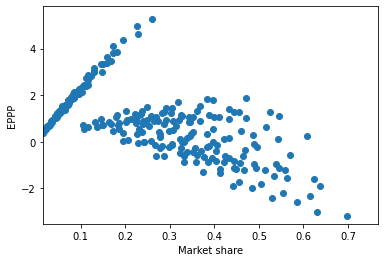

In [18]:
import matplotlib.pyplot as plt

# convert the eppp and share columns to numeric data types

df_3['eppp'] = pd.to_numeric(df_3['eppp'])
df_3['share'] = pd.to_numeric(df_3['share'])

y = df_3['eppp']
x = df_3['share']

plt.scatter(x, y)
plt.xlabel('Market share')
plt.ylabel('EPPP')
plt.xlim(min(x)*1.1, max(x)*1.1)
plt.ylim(min(y)*1.1, max(y)*1.1)
plt.show()

## Business rationale to launch the product with the highest margin: 

### (instead of the product with the highest EPPP)

Launching the product with the highest margin can be a good strategy if the company's objective is to maximize its profit margins. A high-margin product can generate more profits per unit sold, which can be beneficial if the company has high fixed costs or if it wants to reinvest the profits in R&D or marketing. In this case, launching a product with a high margin can help the company achieve its objective even if the expected profit per person is lower. Also, If a company's product has reached maturity, it may choose to prioritize maximizing profit margins as a way to increase profits and create a financial cushion. This can involve focusing on products with high profit margins and directing the resulting profits towards other areas of the business, such as research and development or expansion into new markets.

In [19]:
max_indexaaa = df3['margin'].astype(float).argmax()
df3.loc[max_indexaaa]

Cand          1
Pr           30
Ins         0.5
Cap          12
Cln           D
Cont         Sl
Brd           C
share     0.017
cost        3.0
margin     27.0
eppp      0.459
Name: 0, dtype: object

So, the company should prefer candidate 1 if they want to launch the product with the highest margin.

## Business rationale to launch the product with the lowest production cost:

### (instead of the product with the highest EPPP)

Launching a product with the lowest production cost can be a strategic decision for a company, as it can help to achieve economies of scale and improve overall profitability. By minimizing production costs, a company can increase its profit margins and potentially offer the product at a lower price point, which can increase sales and market share. Additionally, products with lower production costs may have a longer life cycle, as they can be sustained at a lower price point over time. However, it is important to ensure that the product quality and value proposition are not compromised by the focus on low production costs.

In [20]:
low_cost_row = df_3.loc[df_3['cost'] == df_3['cost'].min()]
low_cost_row

,Cand,Pr,Ins,Cap,Cln,Cont,Brd,share,cost,margin,eppp
0,1,30,0.5,12,D,Sl,C,0.017,3.0,27.0,0.459
81,82,10,0.5,12,D,Sl,C,0.105,3.0,7.0,0.735
162,163,5,0.5,12,D,Sl,C,0.194,3.0,2.0,0.388


So, the company should prefer one of the candidates, 1 or 82 or 163, depending on the elasticity of the target customer segment (price sensitive or not) if they want to launch the product with the lowest cost. 

## Business rationale to launch the product with the highest revenue per person

### (instead of the product with the highest EPPP)

Launching the product with the highest revenue per person in the market could be a good strategy if the company is seeking to maximize short-term revenue or market share, or if the market is small and niche, and the target audience is willing to pay a premium price for the product. However, if the goal is to maximize long-term profitability, launching the product with the highest expected profit per person would be a better strategy.


In [21]:
# Create the highest revenue per person column by multiplying the pr and share columns

df4=df3.copy()

# convert the pr and share columns to numeric data types
df4['Pr'] = pd.to_numeric(df4['Pr'])
df4['share'] = pd.to_numeric(df4['share'])


df4['rpp'] = df4['Pr'] * df4['share']

# Find the row(s) where the revenue is the maximum
max_revenue_row = df4.loc[df4['rpp'] == df4['rpp'].max()]
max_revenue_row

,Cand,Pr,Ins,Cap,Cln,Cont,Brd,share,cost,margin,eppp,rpp
71,72,30,3,20,E,Lk,C,0.259,9.6,20.4,5.284,7.77


Here, coincidentally, we get the same candidate 72 in both scenarios, i.e., highest revenue per person in the market and highest expected profit per person

## Non-compensatory choice prediction model

Suppose you want to determine the elimination-by-aspects (EBA) choice of a consumer choosing from among P products, each having A attributes. This is a non-compensatory choice prediction model. 

You are given the following data structures: a P-by-A matrix containing the consumer's rating or performance of each product on each attribute, a vector of length A containing the consumer's importance of each attribute, a vector of length A giving the consumer's cutoff for each attribute (we are considering the general case where it is possible for the consumer to have different cutoffs for different attributes). 



### Defining a function called "apply_eba" that takes these three data structures as input arguments and produces the elimination-by-aspects choice

In [22]:
def apply_eba(ratings_matrix, importances_1d_array, cutoffs_1d_array):
    # Create a copy of the ratings matrix
    matrix = np.copy(ratings_matrix)
    
    # Loop until all attributes with positive importance weights have been processed
    while np.any(importances_1d_array > 0):
        # Find the index of the attribute with the highest importance weight
        indices = np.where(importances_1d_array == np.amax(importances_1d_array))[0]
        index_ = np.random.choice(indices)
        
        # Mark the processed attribute as done by setting its importance weight to -1
        importances_1d_array[index_] = -1
        
        # Get the cutoff value for the processed attribute
        cutoffs = cutoffs_1d_array[index_]
        
        # Filter the matrix to retain only rows where the processed attribute meets the cutoff value
        mask = matrix[:, index_] >= cutoffs
        new_matrix = matrix[mask]
        
        # Break out of the loop if the filtered matrix is empty
        if len(new_matrix) == 0:
            break
        
        # Update the matrix to retain only the rows that meet the cutoff value for the processed attribute
        matrix = new_matrix

    # Select a random product from the filtered matrix
    prod = matrix[np.random.choice(len(matrix))]
    
    # Find the index of the selected product in the original ratings matrix
    ind = np.where(np.all(ratings_matrix == prod, axis=1))[0]
    
    # Return the index of the selected product
    return ind


This function returns an integer from the set {1,2,...,P} corresponding to the product predicted to be purchased by EBA. In EBA, if the rating of a product on a certain attribute is greater than or equal to the cutoff for that attribute, then that product is NOT eliminated. If the rating is strictly less than the cutoff, then the product is eliminated. 

It is important to note that in the EBA algorithm, one may run into situations where there are ties or null sets. So we can follow these steps to avoid such cases:

1) When picking the next- most important attribute, if there is more than one attribute with the highest level of importance, then pick one of the attributes randomly with equal probability, and proceed to eliminate products on the basis of that attribute. 

2) When eliminating products that fall below the performance rating cutoff on a certain attribute, if none of the remaining products meet the cutoff then pick one of those remaining products randomly with equal probability and take the resultant product to be the final choice of that consumer.

Also, because of the tie-breaking, there is randomness potentially involved so that each run of the above apply_eba function may give a somewhat different output for the product chosen. Therefore, in real-life applications, we usually average over multiple runs. Specifically, we need to run the apply_eba function created above a large number of times (like 2000) and then aggregate over all runs. 

For example, if the consumer is seen to buy product P, Q, R, S, T, respectively, 620, 320, 400, 310, 350 times out of the 2000 runs, then we predict that the consumer's probability of buying P, Q, R, S, T to be respectively 0.31, 0.16, 0.20, 0.155, 0.175

### Test cases

In [23]:
# Test case -1
ratings_matrix_1 = np.array([[1, 7, 7, 7], [3, 7, 2, 5], [7, 1, 7, 1]])
importances_1d_array_1 = np.array([9, 55, 12, 24])
cutoffs_1d_array_1 = np.array([2, 2, 2, 2])

ind_1 = apply_eba(ratings_matrix_1, importances_1d_array_1, cutoffs_1d_array_1)
print("The chosen product is product", ind_1+1)

The chosen product is product [2]


In [24]:
# Test case -2
import collections

num_p = collections.Counter()

for i in range(2000):
    ratings_matrix_2 = np.array([[1, 1, 2, 3, 4, 5, 5], 
                                 [3, 4, 2, 7, 3, 5, 3], 
                                 [2, 4, 3, 4, 6, 4, 3], 
                                 [4, 1, 4, 3, 5, 6, 6], 
                                 [3, 1, 6, 6, 4, 6, 4]])
    cutoffs_1d_array_2 = np.array([1.5, 1.5, 3.5, 2.5, 1.5, 2.5, 2.5])
    importances_1d_array_2 = np.array([17, 9, 9, 13, 22, 26, 4])
    prod = apply_eba(ratings_matrix_2, importances_1d_array_2, cutoffs_1d_array_2)
    num_p.update(prod)

result = np.zeros(5)
for i in range(5):
    result[i] = num_p[i] / 2000

print("Probability of choosing product-1:", result[0])
print("Probability of choosing product-2:", result[1])
print("Probability of choosing product-3:", result[2])
print("Probability of choosing product-4:", result[3])
print("Probability of choosing product-5:", result[4])


Probability of choosing product-1: 0.0
Probability of choosing product-2: 0.2465
Probability of choosing product-3: 0.246
Probability of choosing product-4: 0.2545
Probability of choosing product-5: 0.253
